<a href="https://colab.research.google.com/github/rahul-727/AML-Lab5/blob/main/2348544_prg5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform the following using Program_5_dataset
1. Build a simple linear Regression considering ‘CREA’ as predictor variable and ‘PROT’ as
Target variable (for all models)
2. Calculate the VIF for all the attributes except X (Patient ID/No.), 2) Category 3) Age, and 4)
Sex. Based on the VIF factor, finalize the list of predictors
3. Split the data into train and test datasets in the ratio of 80:20 (for all experiments)
4. Build a multiple linear regression model to predict the target variable ‘PROT’ using the selected
predictors
5. Build a polynomial regression model using the attribute that has highest VIF for 3 different
degrees
6. Build a Ridge regression model using the attribute that has highest VIF for 13 different values
of alpha ranging from 0.1 to 150
7. Build a LASSO regression model using the attribute that has highest VIF for different values of
alpha ranging from 0.1 to 100
8. Use N-fold cross validation for training the model created.
9. Evaluate the models using mean squared error values, R-squared Values and adjusted R-squared
values (wherever applicable) on the train and test dataset
10. Print intercept and coefficient values wherever appicable
11. Provide a comparative analysis graph of models built and give conceptual inferences on all the
models built

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv('/content/program_5_dataset.csv')
data.head(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [76]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [77]:
data = data.dropna()

In [78]:
X = data[['CREA']].values
Y = data['PROT'].values

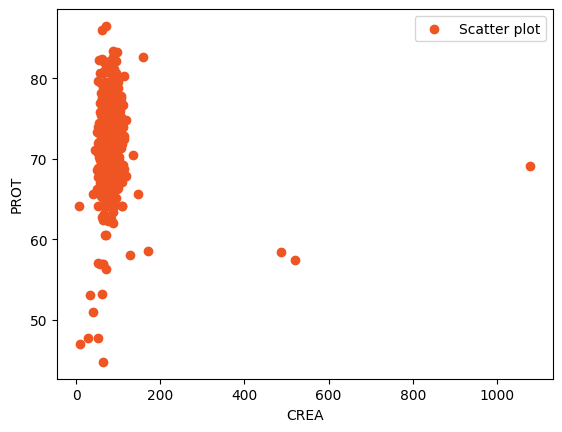

In [79]:
plt.scatter(X, Y, c='#ef5423', label='Scatter plot')

plt.xlabel('CREA')
plt.ylabel('PROT')
plt.legend()
plt.show()

# Building Simple Linear regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [81]:
coefficient = model.coef_[0]
intercept = model.intercept_

print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')

Coefficient: -0.0036262632638168544
Intercept: 72.21331496647235


# Printing Train and test Set mse,r2 and adjusted r2 values

In [82]:
from sklearn.metrics import mean_squared_error, r2_score
Y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)
n_train=len(Y_train)
k_train =1
adj_r2_train = ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))

print(f'Training Set Metrics:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')
print(f'Train Adjusted R-squared: {adj_r2_train}')

Y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)
n_test=len(Y_test)
k_test =1
adj_r2_test = ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

print('\nTesting Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')
print(f'Train Adjusted R-squared: {adj_r2_test}')

Training Set Metrics:
Mean Squared Error: 28.84020207572904
R-squared: 0.001438312305032663
Train Adjusted R-squared: 1.000723076629372

Testing Set Metrics:
Mean Squared Error: 24.98052149031294
R-squared: -0.00025751174954624645
Train Adjusted R-squared: 1.0090317004491036


Based on the metrics values the performance of the model is very poor

In [83]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [84]:
print(X.shape)


(580, 1)


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculating the VIF
X=data[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT']]

vif=pd.Series([variance_inflation_factor(X.values,idx)
    for idx in range(X.shape[1])],
    index=X.columns)

print(vif)


ALB     31.162740
ALP     10.024253
ALT      3.184002
AST      2.938453
BIL      1.678633
CHE     22.397373
CHOL    27.238712
CREA     3.656226
GGT      2.542260
dtype: float64


Based on vif values ALB, ALP,CHE,CHOL are having high vif values that is they are having high muticollinearity so we are removing them from the list of predictors

# Multiple Linear regression

In [86]:
x_final = data[['ALT','AST','BIL','CREA','GGT']]
y_final = data['PROT']

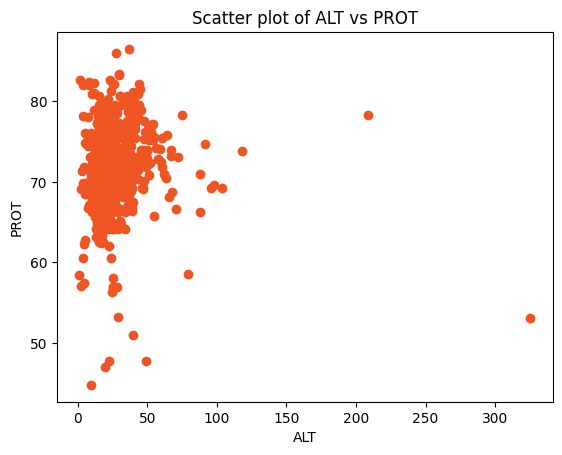

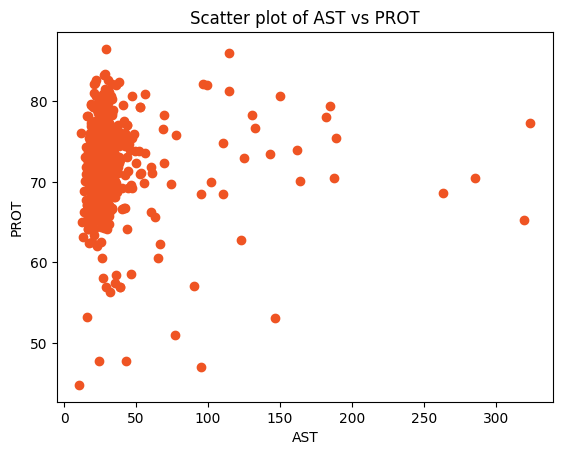

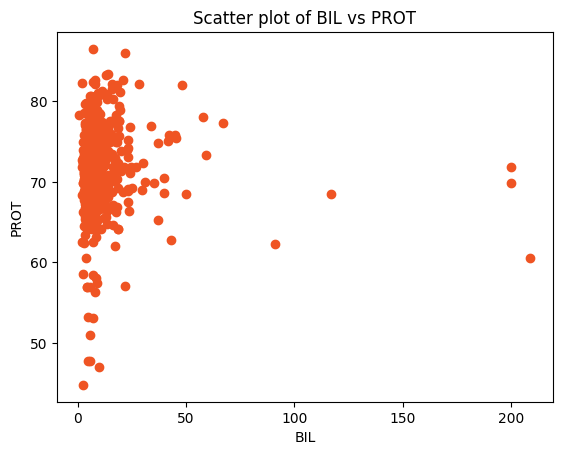

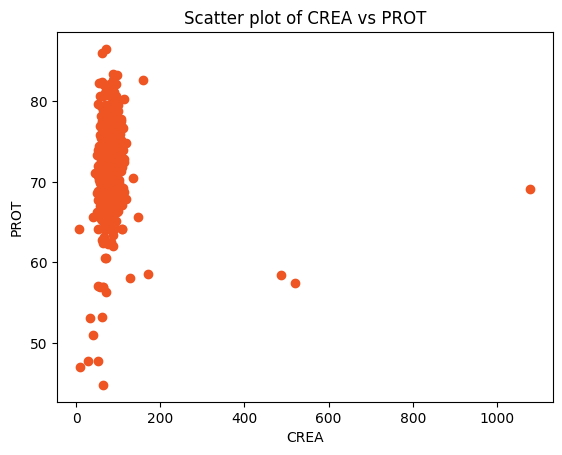

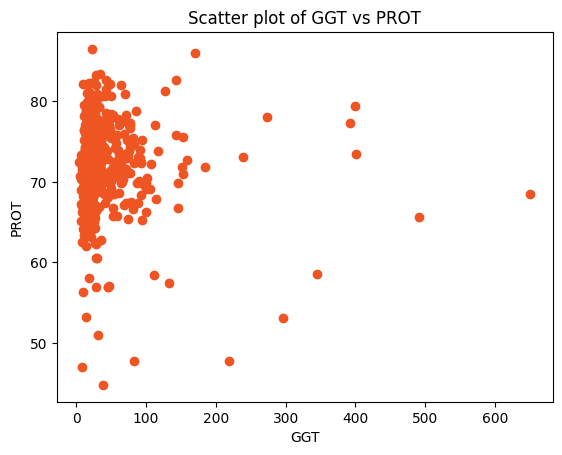

In [87]:
for predictor in ['ALT','AST','BIL','CREA','GGT']:
    plt.scatter(data[predictor], data['PROT'], c='#ef5423')
    plt.title(f'Scatter plot of {predictor} vs PROT')
    plt.xlabel(predictor)
    plt.ylabel('PROT')
    plt.show()

In [88]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

In [89]:
model1=LinearRegression()

model1.fit(x_final, y_final)

print("Intercept:",model1.intercept_,'\nCoefficeints',model1.coef_)

Intercept: 72.15509768728454 
Coefficeints [ 0.00053251  0.00831675 -0.00725997 -0.00267962 -0.00563103]


In [90]:
Y_train_pred = model1.predict(X_train1)
mse_train = mean_squared_error(Y_train1, Y_train_pred)
r2_train = r2_score(Y_train1, Y_train_pred)
n_train=len(Y_train1)
k_train =1
adj_r2_train = ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))

print(f'Training Set Metrics:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')
print(f'Train Adjusted R-squared: {adj_r2_train}')

Y_test_pred = model1.predict(X_test1)

mse_test = mean_squared_error(Y_test1, Y_test_pred)
r2_test = r2_score(Y_test1, Y_test_pred)
n_test=len(Y_test1)
k_test =1
adj_r2_test = ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

print('\nTesting Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')
print(f'Train Adjusted R-squared: {adj_r2_test}')

Training Set Metrics:
Mean Squared Error: 28.923176118334798
R-squared: -0.0014345767198682413
Train Adjusted R-squared: 1.0036021840287856

Testing Set Metrics:
Mean Squared Error: 24.161686512545717
R-squared: 0.03252986771779398
Train Adjusted R-squared: 0.9759567123899446


this model is also performing poorly -ve r-squared value indicate the model is not able to capture the underlying patterns

# Polynomial regression

In [91]:
x_poly = data[['ALB','ALP','CHE','CHOL']]
y_poly = data['PROT']

In [92]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_poly, y_poly, test_size=0.34, random_state=42)


Results for Polynomial Degree 2:
Training Set:
Mean Squared Error: 15.609878981958042
R-squared: 0.43456236890192945
Adjusted R-squared: 0.5886113045037292

Test Set:
Mean Squared Error: 17.9209936045121
R-squared: 0.38098145553017415
Adjusted R-squared: 0.3299634436233204


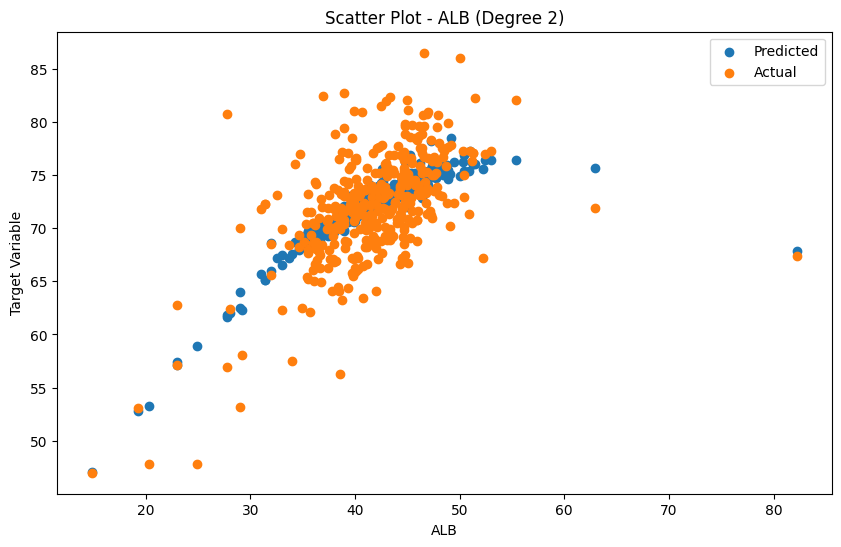

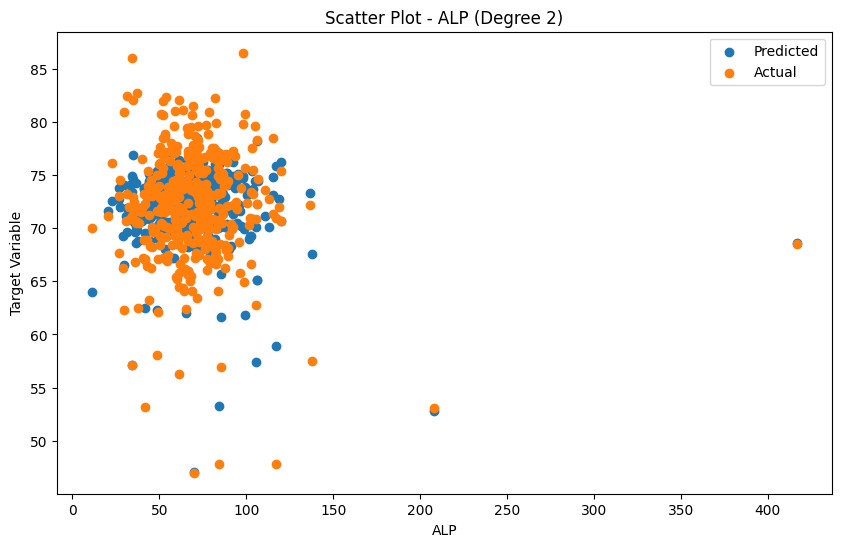

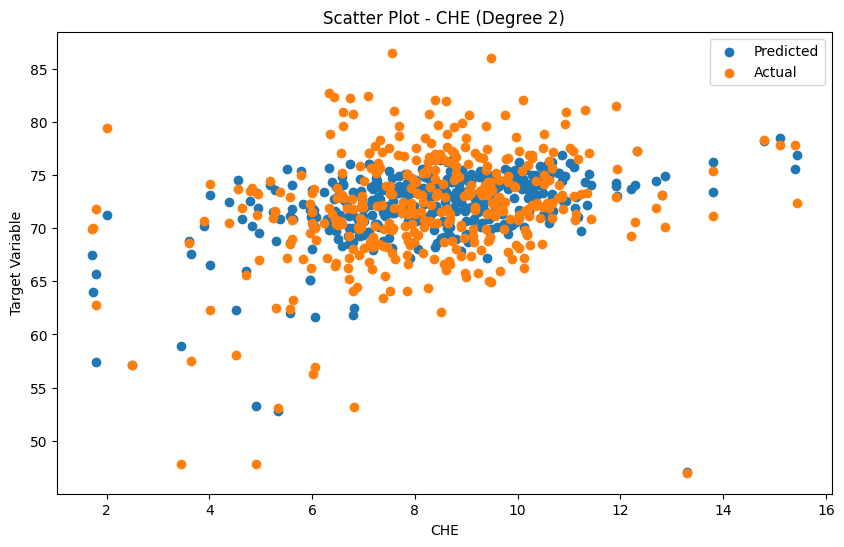

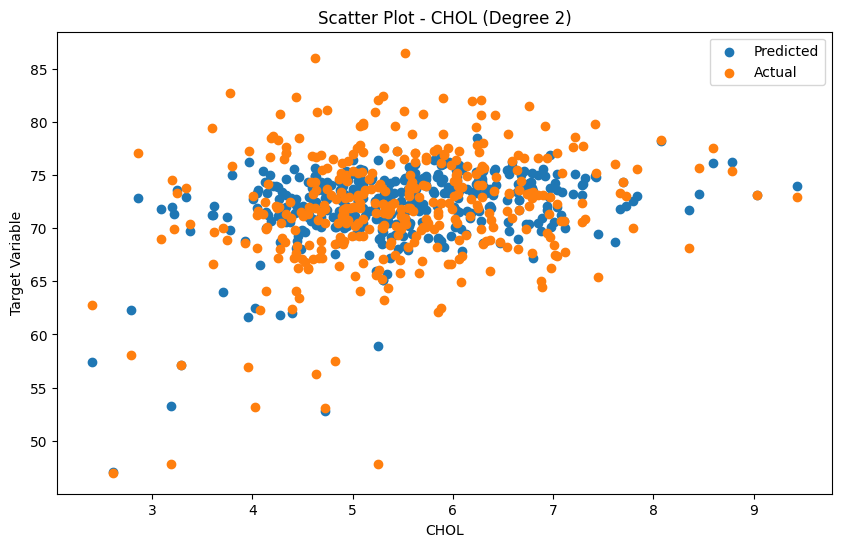


Results for Polynomial Degree 3:
Training Set:
Mean Squared Error: 14.218823832406374
R-squared: 0.48495064733755167
Adjusted R-squared: 0.5671497207063376

Test Set:
Mean Squared Error: 25.67373296081672
R-squared: 0.11318997376850881
Adjusted R-squared: -0.07840478498520853


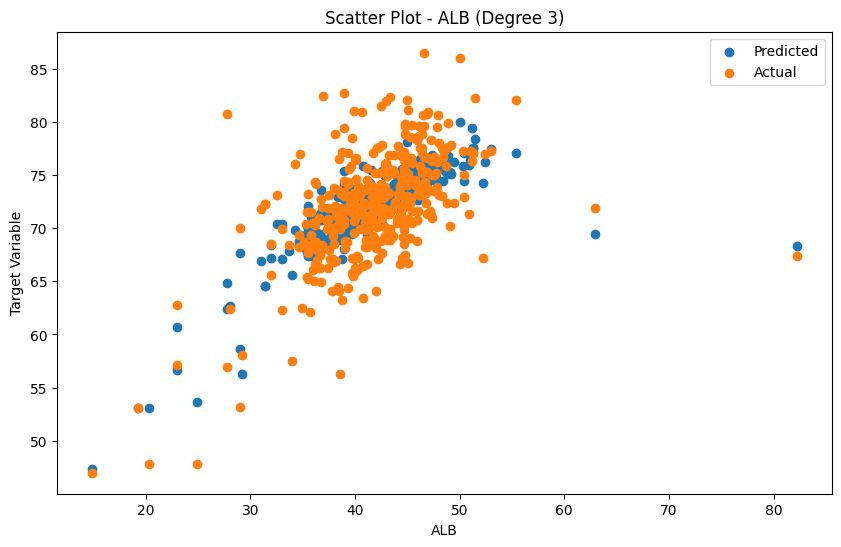

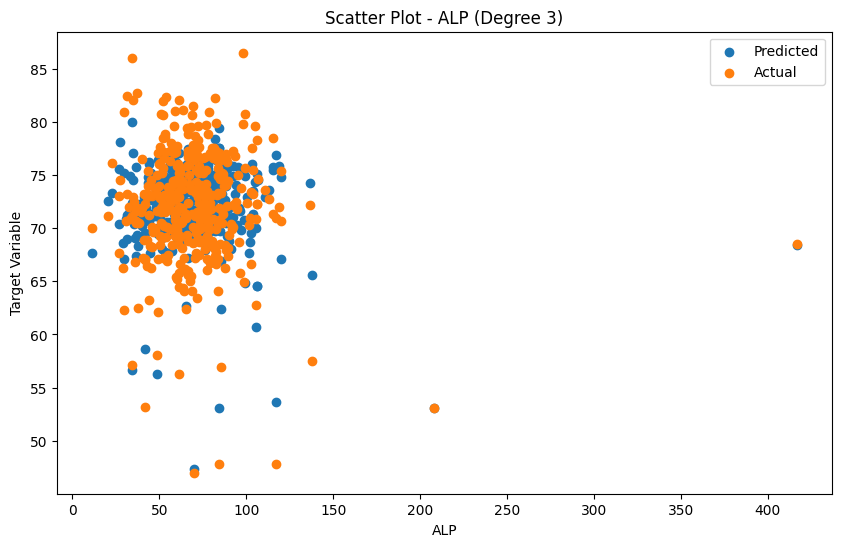

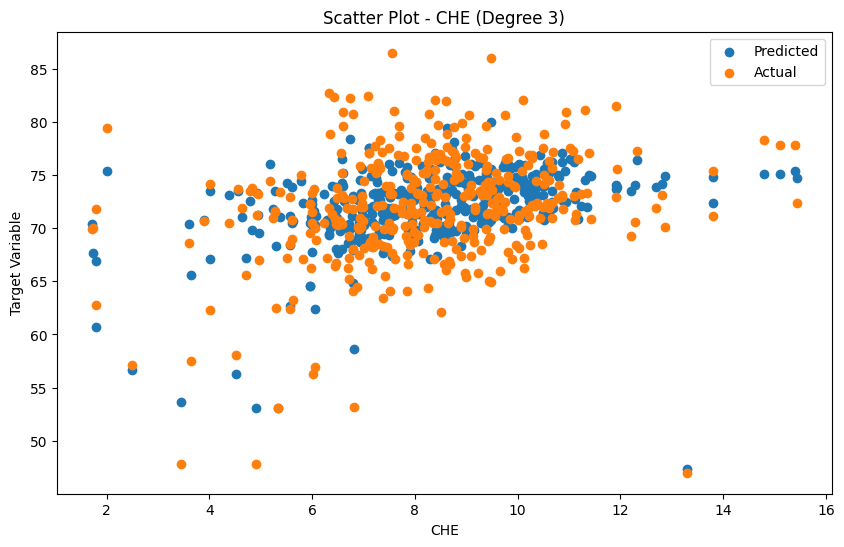

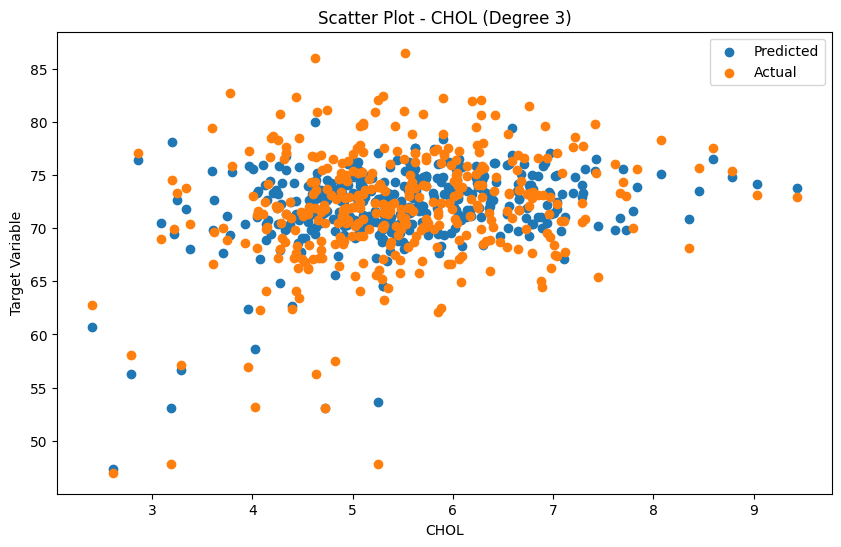


Results for Polynomial Degree 4:
Training Set:
Mean Squared Error: 11.746517032029562
R-squared: 0.5745051725307613
Adjusted R-squared: 0.5212653674140835

Test Set:
Mean Squared Error: 64.55121679557685
R-squared: -1.2296978139924977
Adjusted R-squared: -2.4586651130434807


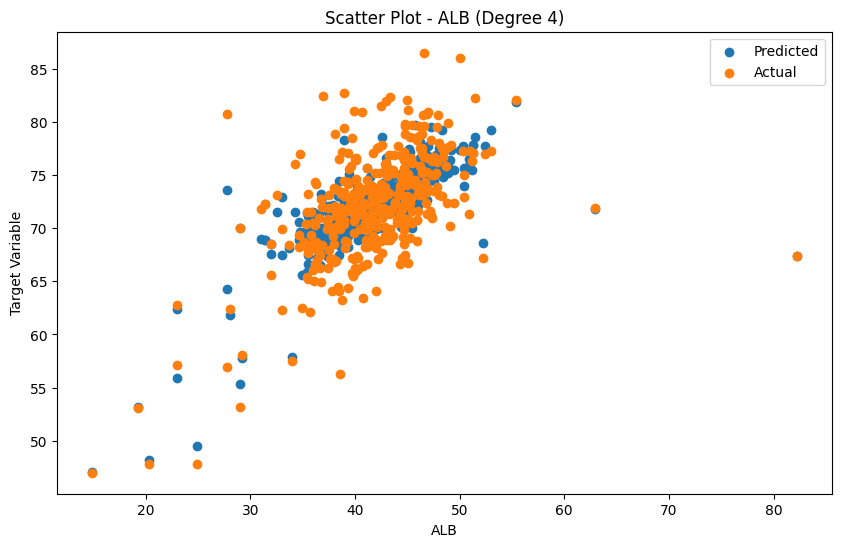

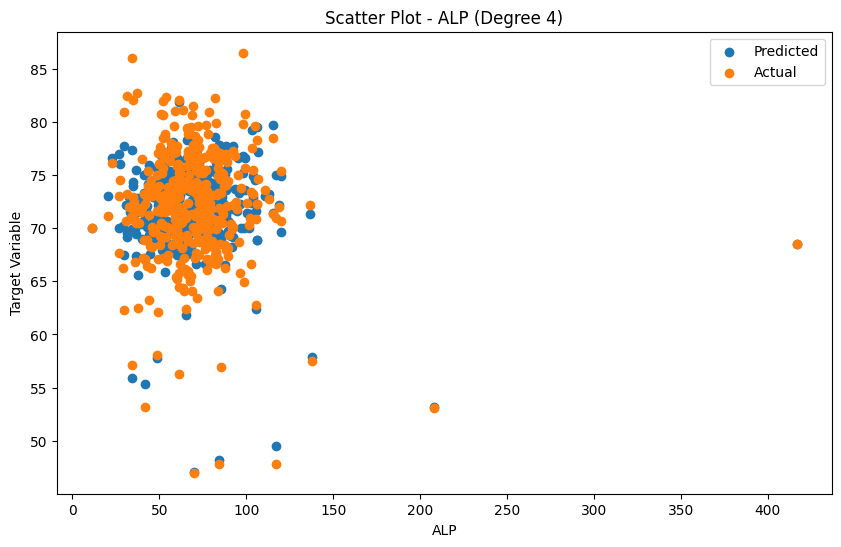

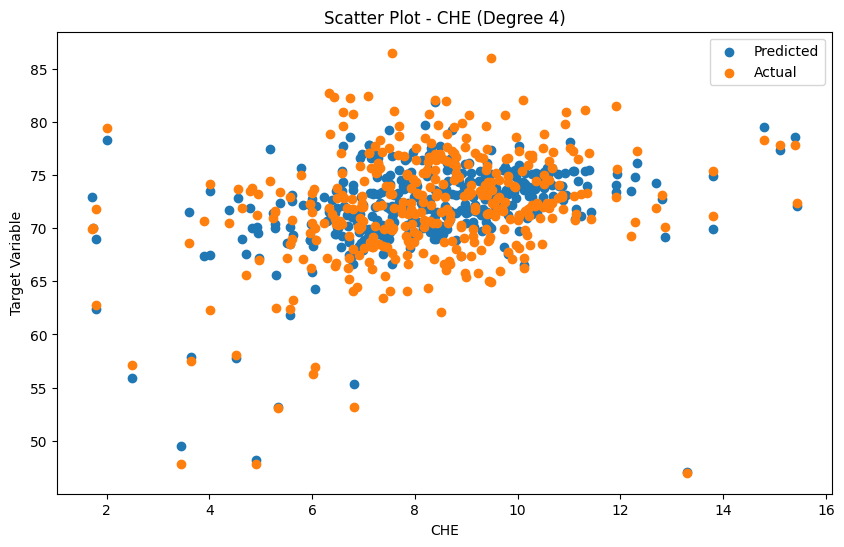

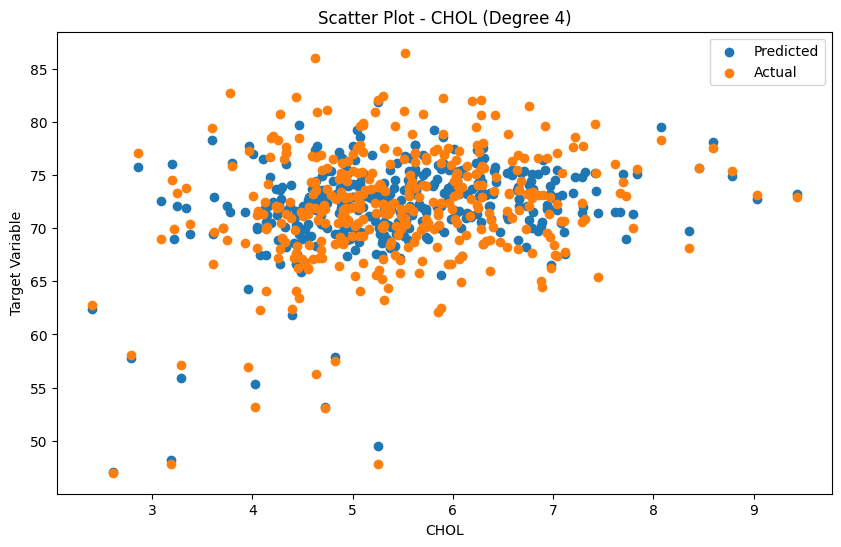

In [93]:
from sklearn.preprocessing import  PolynomialFeatures

for degree in [2, 3, 4]:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_p = poly.fit_transform(X_train2)
    X_test_p = poly.transform(X_test2)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_p, y_train2)

    # Evaluate on the training set
    y_train_pred = model.predict(X_train_p)
    train_mse = mean_squared_error(y_train2, y_train_pred)
    train_r2 = r2_score(y_train2, y_train_pred)
    n_train = len(y_train2)
    p_train = X_train_p.shape[1]
    adj_r2_train = ((1 - train_r2) * (n_train - 1) / (n_train - p_train - 1))

    # Evaluate on the test set
    y_test_pred = model.predict(X_test_p)
    test_mse = mean_squared_error(y_test2, y_test_pred)
    test_r2 = r2_score(y_test2, y_test_pred)
    n_test = len(y_test2)
    p_test = X_test_p.shape[1]
    adj_r2_test = 1 - ((1 - test_r2) * (n_test - 1) / (n_test - p_test - 1))

    # Print the results for each degree
    print(f'\nResults for Polynomial Degree {degree}:')
    print('Training Set:')
    print(f'Mean Squared Error: {train_mse}')
    print(f'R-squared: {train_r2}')
    print(f'Adjusted R-squared: {adj_r2_train}')

    print('\nTest Set:')
    print(f'Mean Squared Error: {test_mse}')
    print(f'R-squared: {test_r2}')
    print(f'Adjusted R-squared: {adj_r2_test}')

    for i, feature in enumerate(X_train2.columns):
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train2[feature], model.predict(X_train_p), label='Predicted')
        plt.scatter(X_train2[feature], y_train2, label='Actual')
        plt.xlabel(feature)
        plt.ylabel('Target Variable')
        plt.legend()
        plt.title(f'Scatter Plot - {feature} (Degree {degree})')
        plt.show()

The polynomial with degree 2 model captures some non-linear patterns in data from the adjusted r-squared value we can see that model is not overfitting. For polynomial with degree 3 the model's training set performance increases, but the model does not do well for tesing set data the adjusted r-squared is neagtive suggesting overfiting for the polynomial with degree 4 also it same as degree 3 suggesting overfitting

# Ridge regression model

In [94]:
x_ridge =  data[['ALB','ALP','CHE','CHOL']]
y_ridge = data['PROT']

In [95]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [96]:
ridge_regressor.fit(x_ridge,y_ridge)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 150}
-20.044395584151893


the besthyperparameter for ridge regression is alpha value 150

# N-Cross validation for ridge

In [97]:
from sklearn.model_selection import cross_val_predict

ridge_predictions = cross_val_predict(ridge_regressor, x_ridge, y_ridge, cv=5)

In [98]:
ridge_mse = mean_squared_error(y_ridge, ridge_predictions)
ridge_r2 = r2_score(y_ridge, ridge_predictions)
n_ridge = len(y_ridge)
k_ridge = x_ridge.shape[1]
adj_r2_ridge = ((1 - ridge_r2) * (n_ridge - 1) / (n_ridge - k_ridge - 1))

print('\nRidge Regression Metrics (Cross-Validation):')
print(f'Mean Squared Error: {ridge_mse}')
print(f'R-squared: {ridge_r2}')
print(f'Adjusted R-squared: {adj_r2_ridge}')


Ridge Regression Metrics (Cross-Validation):
Mean Squared Error: 20.04439558415189
R-squared: 0.28671514325279357
Adjusted R-squared: 0.718246838359361


Model is not that great as r-squared value is around 0.3

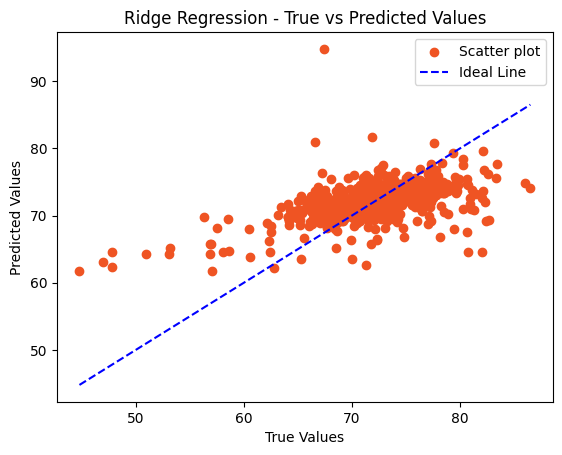

In [99]:
plt.scatter(y_ridge, ridge_predictions, c='#ef5423', label='Scatter plot')
plt.plot([min(y_ridge), max(y_ridge)], [min(y_ridge), max(y_ridge)], linestyle='--', color='blue', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression - True vs Predicted Values')
plt.legend()
plt.show()

# Lasso regression

In [100]:
x_lasso =  data[['ALB','ALP','CHE','CHOL']]
y_lasso = data['PROT']

In [101]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_lasso,y_lasso)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_lasso,y_lasso,test_size=0.33,random_state=2)

prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

{'alpha': 0.001}
-20.056057911577597


best hyperparameter for lasso is 0.001

# N-Cross validation for Lasso

In [102]:
lasso_predictions = cross_val_predict(lasso_regressor, x_lasso, y_lasso, cv=5)

In [103]:
lasso_mse = mean_squared_error(y_lasso, lasso_predictions)
lasso_r2 = r2_score(y_lasso, lasso_predictions)
n_lasso = len(y_lasso)
k_lasso = x_lasso.shape[1]
adj_r2_lasso = ((1 - lasso_r2) * (n_lasso - 1) / (n_lasso - k_lasso - 1))

print('\nLasso Regression Metrics (Cross-Validation):')
print(f'Mean Squared Error: {lasso_mse}')
print(f'R-squared: {lasso_r2}')
print(f'Adjusted R-squared: {adj_r2_lasso}')


Lasso Regression Metrics (Cross-Validation):
Mean Squared Error: 20.056869829672365
R-squared: 0.28627124408947147
Adjusted R-squared: 0.7186938255168627


Lasso also performs similarly as ridge regression the high adjusted r-squared value suggests that model has a good fit

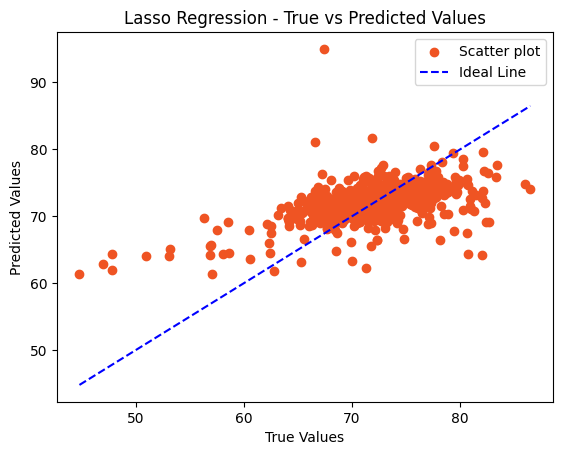

In [104]:
plt.scatter(y_lasso, lasso_predictions, c='#ef5423', label='Scatter plot')
plt.plot([min(y_lasso), max(y_lasso)], [min(y_lasso), max(y_lasso)], linestyle='--', color='blue', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression - True vs Predicted Values')
plt.legend()
plt.show()

From all the models compared we can say that polynomial with degree 2 performs well among polynomial models, ridge and lasso performs better than linear regression models and higher polynomial degree models